In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to build the models
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load the train and test set with the engineered variables


X_train = pd.read_csv('/Users/patrycjapiechowicz/CYBER/xtrain.csv')
X_test = pd.read_csv('/Users/patrycjapiechowicz/CYBER/xtest.csv')

X_train.head()

,label,section_has_non_standard_entry,section_cnt,section_high_entropy_cnt,section_high_entropy_ratio,section_entropy_max,section_has_non_standard_sections_ratio,header_coff_characteristics_chara_32bit_machine,header_coff_characteristics_relocs_stripped,header_coff_characteristics_line_nums_stripped,header_coff_characteristics_local_syms_stripped,header_coff_timestamp,header_coff_machine,header_optional_subsystem,header_optional_magic,header_optional_major_image_version,header_optional_minor_image_version,header_optional_major_linker_version,header_optional_minor_linker_version,header_optional_major_operating_system_version,header_optional_minor_operating_system_version,header_optional_major_subsystem_version,header_optional_minor_subsystem_version,header_optional_sizeof_code,header_optional_sizeof_headers,header_optional_sizeof_heap_commit,header_coff_characteristics_bytes_reversed_lo,header_coff_characteristics_bytes_reversed_hi,header_optional_dll_characteristics_terminal_server_aware,header_optional_dll_characteristics_dynamic_base,header_optional_dll_characteristics_nx_compat,header_coff_characteristics_large_address_aware,header_optional_dll_characteristics_no_seh,header_coff_characteristics_dll,header_coff_characteristics_debug_stripped,header_optional_dll_characteristics_high_entropy_va,header_optional_dll_characteristics_guard_cf,header_optional_dll_characteristics_no_bind,header_coff_characteristics_removable_run_from_swap,header_coff_characteristics_net_run_from_swap,header_coff_characteristics_aggressive_ws_trim,header_optional_dll_characteristics_force_integrity,header_optional_dll_characteristics_appcontainer,header_optional_dll_characteristics_no_isolation,header_coff_characteristics_system,header_optional_dll_characteristics_wdm_driver,strings_printabledist_0,strings_printabledist_1,strings_printabledist_2,strings_printabledist_3,strings_printabledist_4,strings_printabledist_5,strings_printabledist_6,strings_printabledist_7,strings_printabledist_8,strings_printabledist_9,strings_printabledist_10,strings_printabledist_11,strings_printabledist_12,strings_printabledist_13,strings_printabledist_14,strings_printabledist_15,strings_printabledist_16,strings_printabledist_17,strings_printabledist_18,strings_printabledist_19,strings_printabledist_20,strings_printabledist_21,strings_printabledist_22,strings_printabledist_23,strings_printabledist_24,strings_printabledist_25,strings_printabledist_26,strings_printabledist_27,strings_printabledist_28,strings_printabledist_29,strings_printabledist_30,strings_printabledist_31,strings_printabledist_32,strings_printabledist_33,strings_printabledist_34,strings_printabledist_35,strings_printabledist_36,strings_printabledist_37,strings_printabledist_38,strings_printabledist_39,strings_printabledist_40,strings_printabledist_41,strings_printabledist_42,strings_printabledist_43,strings_printabledist_44,strings_printabledist_45,strings_printabledist_46,strings_printabledist_47,strings_printabledist_48,strings_printabledist_49,strings_printabledist_50,strings_printabledist_51,strings_printabledist_52,strings_printabledist_53,strings_printabledist_54,strings_printabledist_55,strings_printabledist_56,strings_printabledist_57,strings_printabledist_58,strings_printabledist_59,strings_printabledist_60,strings_printabledist_61,strings_printabledist_62,strings_printabledist_63,strings_printabledist_64,strings_printabledist_65,strings_printabledist_66,strings_printabledist_67,strings_printabledist_68,strings_printabledist_69,strings_printabledist_70,strings_printabledist_71,strings_printabledist_72,strings_printabledist_73,strings_printabledist_74,strings_printabledist_75,strings_printabledist_76,strings_printabledist_77,strings_printabledist_78,strings_printabledist_79,strings_printabledist_80,strings_printabledist_81,strings_printabledist_82,strings_printabledist_83,strings_printabledist_84,strings_printabledist_85,strings_printabledist_86,strings_printabledist_87,strings_printabledist_88,str

In [4]:
y_train = X_train['label']
y_test = X_test['label']

#### PCA

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=10)

In [7]:
pca.fit(X_train)

PCA(n_components=10)

In [8]:
x_pca = pca.transform(X_train)

In [9]:
X_train.shape

(18000, 181)

In [10]:
x_pca.shape

(18000, 10)

#### Interpreting the components
Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [11]:
pca.components_

array([[ 5.94495087e-02,  8.82729109e-02,  2.23573901e-02, ...,
         5.73647261e-02, -7.74037638e-05, -7.74037638e-05],
       [-1.71364088e-01, -1.51671867e-01,  6.73451926e-03, ...,
         1.56102927e-01, -8.99309190e-05, -8.99309190e-05],
       [-3.29301056e-01,  1.63515561e-01,  3.40853536e-02, ...,
        -2.30661490e-01,  8.66612915e-06,  8.66612915e-06],
       ...,
       [-2.36446469e-01,  1.90152042e-01, -3.02310256e-02, ...,
         6.94884221e-02,  9.06357687e-05,  9.06357687e-05],
       [ 1.02602784e-02, -9.51888158e-02,  3.90559612e-02, ...,
         9.48637667e-02,  5.60508573e-05,  5.60508573e-05],
       [ 8.36318555e-02, -7.05432658e-02,  8.03156649e-03, ...,
        -1.27596865e-02, -4.62328778e-05, -4.62328778e-05]])

In [12]:
df_comp = pd.DataFrame(pca.components_,columns=X_train.columns)

In [13]:
df_comp

,label,section_has_non_standard_entry,section_cnt,section_high_entropy_cnt,section_high_entropy_ratio,section_entropy_max,section_has_non_standard_sections_ratio,header_coff_characteristics_chara_32bit_machine,header_coff_characteristics_relocs_stripped,header_coff_characteristics_line_nums_stripped,header_coff_characteristics_local_syms_stripped,header_coff_timestamp,header_coff_machine,header_optional_subsystem,header_optional_magic,header_optional_major_image_version,header_optional_minor_image_version,header_optional_major_linker_version,header_optional_minor_linker_version,header_optional_major_operating_system_version,header_optional_minor_operating_system_version,header_optional_major_subsystem_version,header_optional_minor_subsystem_version,header_optional_sizeof_code,header_optional_sizeof_headers,header_optional_sizeof_heap_commit,header_coff_characteristics_bytes_reversed_lo,header_coff_characteristics_bytes_reversed_hi,header_optional_dll_characteristics_terminal_server_aware,header_optional_dll_characteristics_dynamic_base,header_optional_dll_characteristics_nx_compat,header_coff_characteristics_large_address_aware,header_optional_dll_characteristics_no_seh,header_coff_characteristics_dll,header_coff_characteristics_debug_stripped,header_optional_dll_characteristics_high_entropy_va,header_optional_dll_characteristics_guard_cf,header_optional_dll_characteristics_no_bind,header_coff_characteristics_removable_run_from_swap,header_coff_characteristics_net_run_from_swap,header_coff_characteristics_aggressive_ws_trim,header_optional_dll_characteristics_force_integrity,header_optional_dll_characteristics_appcontainer,header_optional_dll_characteristics_no_isolation,header_coff_characteristics_system,header_optional_dll_characteristics_wdm_driver,strings_printabledist_0,strings_printabledist_1,strings_printabledist_2,strings_printabledist_3,strings_printabledist_4,strings_printabledist_5,strings_printabledist_6,strings_printabledist_7,strings_printabledist_8,strings_printabledist_9,strings_printabledist_10,strings_printabledist_11,strings_printabledist_12,strings_printabledist_13,strings_printabledist_14,strings_printabledist_15,strings_printabledist_16,strings_printabledist_17,strings_printabledist_18,strings_printabledist_19,strings_printabledist_20,strings_printabledist_21,strings_printabledist_22,strings_printabledist_23,strings_printabledist_24,strings_printabledist_25,strings_printabledist_26,strings_printabledist_27,strings_printabledist_28,strings_printabledist_29,strings_printabledist_30,strings_printabledist_31,strings_printabledist_32,strings_printabledist_33,strings_printabledist_34,strings_printabledist_35,strings_printabledist_36,strings_printabledist_37,strings_printabledist_38,strings_printabledist_39,strings_printabledist_40,strings_printabledist_41,strings_printabledist_42,strings_printabledist_43,strings_printabledist_44,strings_printabledist_45,strings_printabledist_46,strings_printabledist_47,strings_printabledist_48,strings_printabledist_49,strings_printabledist_50,strings_printabledist_51,strings_printabledist_52,strings_printabledist_53,strings_printabledist_54,strings_printabledist_55,strings_printabledist_56,strings_printabledist_57,strings_printabledist_58,strings_printabledist_59,strings_printabledist_60,strings_printabledist_61,strings_printabledist_62,strings_printabledist_63,strings_printabledist_64,strings_printabledist_65,strings_printabledist_66,strings_printabledist_67,strings_printabledist_68,strings_printabledist_69,strings_printabledist_70,strings_printabledist_71,strings_printabledist_72,strings_printabledist_73,strings_printabledist_74,strings_printabledist_75,strings_printabledist_76,strings_printabledist_77,strings_printabledist_78,strings_printabledist_79,strings_printabledist_80,strings_printabledist_81,strings_printabledist_82,strings_printabledist_83,strings_printabledist_84,strings_printabledist_85,strings_printabledist_86,strings_printabledist_87,strings_printabledist_88,str

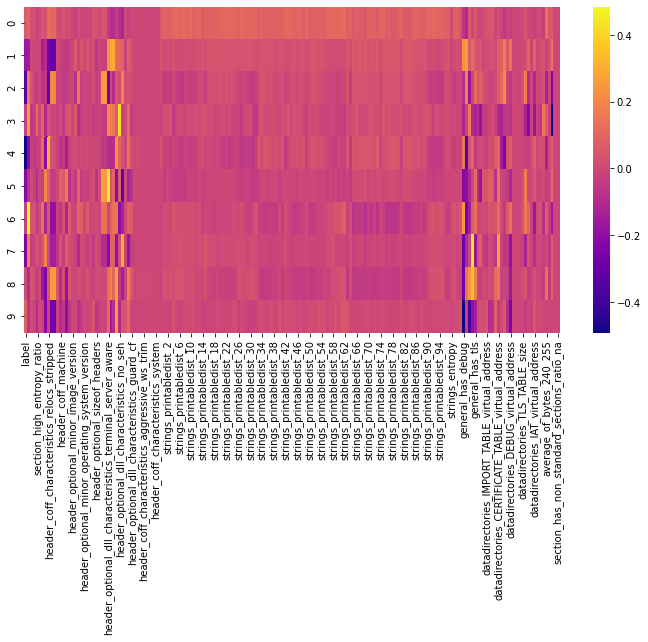

In [14]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)